<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231016_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ls ./drive/MyDrive/data/bike*

./drive/MyDrive/data/bike_rentals.csv   ./drive/MyDrive/data/bike_train.csv
./drive/MyDrive/data/bikes_cleaned.csv


In [ ]:
df_bikes = pd.read_csv('./drive/MyDrive/data/bikes_cleaned.csv')

In [ ]:
df_bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,12,0.0,4.0,1.0,2,0.254167,0.226642,0.652917,0.350133,2114
727,1.0,1.0,12,0.0,5.0,1.0,2,0.253333,0.255046,0.590000,0.155471,3095
728,1.0,1.0,12,0.0,6.0,0.0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1.0,1.0,12,0.0,0.0,0.0,1,0.255833,0.231700,0.483333,0.350754,1796


In [ ]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((548, 11), (183, 11), (548,), (183,))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
def gbm_rmse(X_train, y_train, X_test, n_est):
    learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]
    rmse_list=[]
    for value in learning_rate_values:
        gbr = GradientBoostingRegressor(max_depth=2, n_estimators=n_est, random_state=2, learning_rate=value)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse=MSE(y_test, y_pred)**0.5
        rmse_list.append(rmse)
    return rmse_list

In [ ]:
def plot_gbm_rmse(rmse_list, x=None, values='learning_rate'):
    if x is None :
        x = np.arange(len(rmse_list))
    plt.figure(figsize=(8,6))
    plt.plot(x, rmse_list)
    plt.xlabel(values)
    plt.ylabel('RMSE')
    plt.grid()

In [ ]:
learning_rate_values = [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5, 1.0]

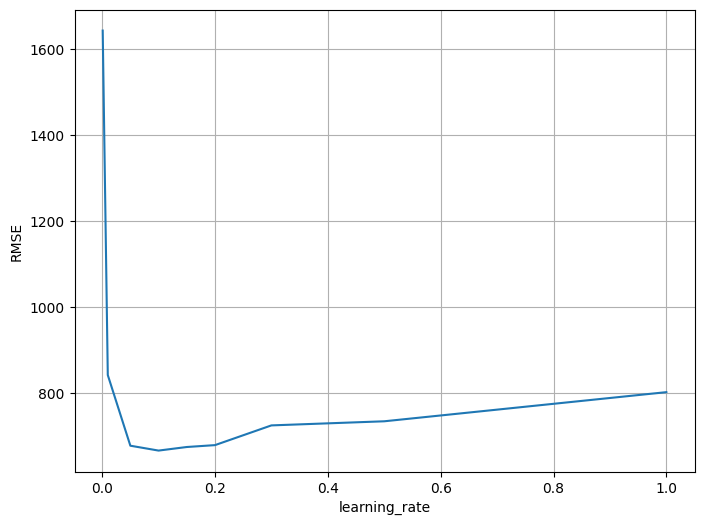

In [ ]:
rmse_list = gbm_rmse(X_train, y_train, X_test, 300)
plot_gbm_rmse(rmse_list, learning_rate_values)

In [ ]:
depths = [None, 1, 2, 3, 4]

In [ ]:
def gbm_rmse(X_train, y_train, X_test, value_list):
    rmse_list=[]
    for value in value_list:
        gbr = GradientBoostingRegressor(max_depth=value, n_estimators=300, random_state=2, learning_rate=0.1)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse=MSE(y_test, y_pred)**0.5
        rmse_list.append(rmse)
    return rmse_list

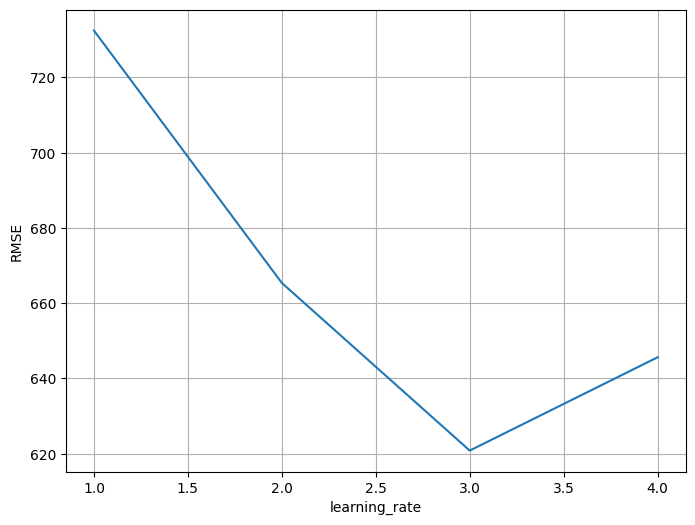

In [ ]:
rms_list=gbm_rmse(X_train, y_train, X_test, depths)
plot_gbm_rmse(rms_list, depths)

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, random_state=2, learning_rate=0.1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse=MSE(y_test, y_pred)**0.5

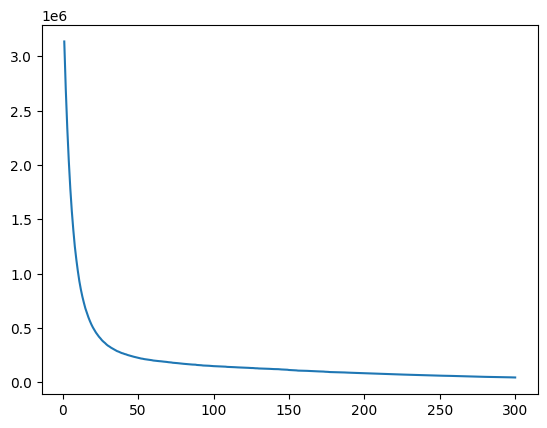

In [ ]:
plt.plot(range(1, 301), gbr.train_score_)

In [ ]:
samples = [1, 0.9, 0.8, 0.7, 0.6, 0.5]

In [ ]:
def gbm_rmse(X_train, y_train, X_test, value_list):
    rmse_list=[]
    for value in value_list:
        gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, random_state=2, learning_rate=0.1, subsample=value)
        gbr.fit(X_train, y_train)
        y_pred = gbr.predict(X_test)
        rmse=MSE(y_test, y_pred)**0.5
        rmse_list.append(rmse)
    return rmse_list

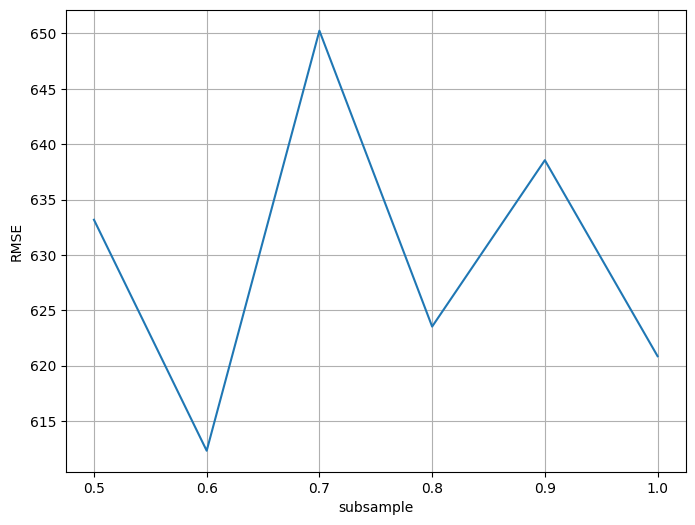

In [ ]:
rmse_list = gbm_rmse(X_train, y_train, X_test, samples)
plot_gbm_rmse(rmse_list, samples, 'subsample')

subsample 이 1보다 작으면

나머지 데이터를 사용해 개별트리의 예측 점수를 누적 평균하여 산출해 준다. (=OOB_score)

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, random_state=2,
                                learning_rate=0.1, subsample=0.6)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
rmse = MSE(y_test, y_pred)**0.5

In [ ]:
rmse

612.3105820968342

Text(0.5, 0, 'n_estimators')

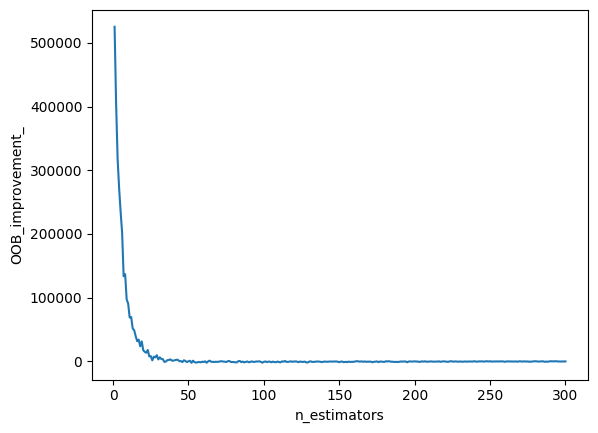

In [ ]:
plt.plot(range(1, 301), gbr.oob_improvement_)
plt.ylabel('OOB_improvement_')
plt.xlabel('n_estimators')

## GBM 하이퍼파라미터 초깃값
    
    max_depth = 3

    subsample = 0.6

    n_estimators = 300

    learning_rate = 0.1

In [ ]:
params = {'subsample':[0.55, 0.6, 0.65], 'n_estimators':[300, 500, 1000],'learning_rate':[0.05, 0.075, 0.1] }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
gbr = GradientBoostingRegressor(max_depth=3, random_state=2)

In [ ]:
rand_reg = RandomizedSearchCV(gbr, params, n_iter=10, scoring='neg_mean_squared_error',
                              cv=5, n_jobs=-1, random_state=2)

In [ ]:
rand_reg.fit(X_train, y_train)
best_model = rand_reg.best_estimator_
best_params = rand_reg.best_params_
best_score = np.sqrt(-rand_reg.best_score_)

In [ ]:
y_pred = best_model.predict(X_test)
rmese_test = MSE(y_test, y_pred)**0.5
print(rmese_test)

635.2245320726106


In [ ]:
best_params

{'subsample': 0.55, 'n_estimators': 300, 'learning_rate': 0.05}

In [ ]:
best_score

661.5668751737916

max_depth = 3

n_estimators=1600

subsample = 0.65

learning_rate = 0.02

best_score = 622

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, subsample=0.65, random_state=2)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
MSE(y_test, y_pred)**0.5

614.3886064323099

## xgboost 에는

## 파이썬과 호환 되는 패키지(사이킷런과는 호횐되지 않음) : xgboost

## 사이킷런과 호환되는 패키지 : XGBClassifier, XGBRegressor

## XGBClassifier와 XGBRegressor 는 xgboost에 포함 되어 있다.


        #사이킷런과 호환 안됨
        # DMatrix 데이터 타입 사용
        import xgboost as xgb

        #사이킷런과 호환되는 패키지를 사용할때
        from xgboost import XGBClassifier, XGBRegressor

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=2)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
xgb_c = XGBClassifier(booster='gbtree', objective='multi:softprob', max_depth=6, learning_rate=0.1,
                      n_estimators = 100, n_jobs=-1)

booster : 기본 학습기 설정 (gbtree, gblinear)

objective : Learing Task Parameters, 회귀/분류:손실 함수

        reg:squarederror 회귀:제곱오차

        binary:logistic 이진분류:로지스틱

        multi:softprob 다중분류:predict()에서 확률 반환

        multi:softmax  다중분류:predict()에서 클래스값 반환



In [ ]:
xgb_c.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb_c.predict(X_test)

In [ ]:
accuracy_score(y_pred, y_test)

0.9736842105263158

In [ ]:
xgb_c.score(X_test, y_test) #회귀일때 r2 반환

0.9736842105263158

In [ ]:
y_pred[:5]

array([0, 0, 2, 0, 0])

In [ ]:
import xgboost as xgb

dtrain= xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test[:5])

In [ ]:
param = {'objective':'multi:softprob', 'num_class':3}
bstr = xgb.train(param, dtrain)
bstr.predict(dtest)

array([[0.9486482 , 0.02711029, 0.02424142],
       [0.9486482 , 0.02711029, 0.02424142],
       [0.02841366, 0.05416913, 0.9174172 ],
       [0.9486482 , 0.02711029, 0.02424142],
       [0.9486482 , 0.02711029, 0.02424142]], dtype=float32)

In [ ]:
param = {'objective':'multi:softmax', 'num_class':3}
bstr = xgb.train(param, dtrain)
bstr.predict(dtest)

array([0., 0., 2., 0., 0.], dtype=float32)

당뇨병데이터 : 회귀